## Mortgage Loans: Logistic Regression Example

In [34]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import pickle

In [35]:
df = pd.read_csv('../data/loan_data_set.csv')
df.shape

(614, 13)

In [36]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [37]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [38]:
df['Married'] = df['Married'].replace(to_replace ="Yes",value =1)
df['Married'] = df['Married'].replace(to_replace ="No",value =0)
df['Married'].value_counts()

1.0    398
0.0    213
Name: Married, dtype: int64

In [39]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [40]:
df[df['Married'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


## Exploratory Data Analysis

In [43]:
# declare the list of features
features = ['Credit_History','LoanAmount','Loan_Amount_Term','ApplicantIncome']
new_features = ['Credit_History','Married','LoanAmount','Loan_Amount_Term','ApplicantIncome']

In [44]:
# recode missing values
print(df[new_features].isnull().sum())
for feature in ['LoanAmount','Loan_Amount_Term','ApplicantIncome']:
    df[feature].fillna(value=df[feature].mean(), inplace=True)
print(df[new_features].isnull().sum())

Credit_History      50
Married              3
LoanAmount           0
Loan_Amount_Term     0
ApplicantIncome      0
dtype: int64
Credit_History      50
Married              3
LoanAmount           0
Loan_Amount_Term     0
ApplicantIncome      0
dtype: int64


In [45]:
df.dropna(subset=['Married'], inplace=True)
#df['Married'] = pd.get_dummies(df['Married'].notna())

In [46]:
df['Married'].value_counts()

1.0    398
0.0    213
Name: Married, dtype: int64

In [47]:
for feature in ['LoanAmount','Loan_Amount_Term','ApplicantIncome']:
    print(df[new_features].agg(['mean', 'median', 'min', 'max']))

        Credit_History   Married  LoanAmount  Loan_Amount_Term  \
mean          0.841355  0.651391  146.370958         341.91162   
median        1.000000  1.000000  128.000000         360.00000   
min           0.000000  0.000000    9.000000          12.00000   
max           1.000000  1.000000  700.000000         480.00000   

        ApplicantIncome  
mean        5399.513912  
median      3800.000000  
min          150.000000  
max        81000.000000  
        Credit_History   Married  LoanAmount  Loan_Amount_Term  \
mean          0.841355  0.651391  146.370958         341.91162   
median        1.000000  1.000000  128.000000         360.00000   
min           0.000000  0.000000    9.000000          12.00000   
max           1.000000  1.000000  700.000000         480.00000   

        ApplicantIncome  
mean        5399.513912  
median      3800.000000  
min          150.000000  
max        81000.000000  
        Credit_History   Married  LoanAmount  Loan_Amount_Term  \
mean        

In [48]:
# credit: missing data
print(df.shape)
print(df['Credit_History'].value_counts(dropna=False))
df.dropna(subset=['Credit_History'], inplace=True)
print(df.shape)

(611, 13)
1.0    472
0.0     89
NaN     50
Name: Credit_History, dtype: int64
(561, 13)


In [49]:
# recode the target variable as numeric
df['Loan_Approval']=np.where(df['Loan_Status']=="Y", 1, 0)
df['Loan_Approval'].value_counts(dropna=False)

1    382
0    179
Name: Loan_Approval, dtype: int64

## Model Building

In [50]:
# specify X and y
y = df['Loan_Approval']
X = df[new_features]
#X = df[features]

In [51]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=12)

In [52]:
# Fit the model to the training dataset
mymodel = LogisticRegression()
mymodel.fit(X_train, y_train)

LogisticRegression()

In [53]:
# coefficients and intercept
mymodel.intercept_
mymodel.coef_

array([[ 2.44809224e+00,  5.95683727e-01, -2.74246716e-03,
        -4.25197565e-03,  1.49808482e-05]])

In [54]:
# Predict the y-values on the testing dataset
y_preds = mymodel.predict(X_test)
y_probs = mymodel.predict_proba(X_test)

## Model Evalution

In [55]:
# Evaluate the model
print(metrics.classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.55      0.71        44
           1       0.83      1.00      0.91        97

    accuracy                           0.86       141
   macro avg       0.91      0.77      0.81       141
weighted avg       0.88      0.86      0.84       141



In [56]:
# save your eval report as an html file
report = metrics.classification_report(y_test, y_preds, output_dict=True)
evalreport = pd.DataFrame(report).transpose()
evalreport.to_html('../assets/evalreport.html')
evalreport

,precision,recall,f1-score,support
0,1.000000,0.545455,0.705882,44.000000
1,0.829060,1.000000,0.906542,97.000000
accuracy,0.858156,0.858156,0.858156,0.858156
macro avg,0.914530,0.772727,0.806212,141.000000
weighted avg,0.882403,0.858156,0.843925,141.000000


In [57]:
# true positives, etc.
y_score = mymodel.predict_proba(X_test)[:, 1]
fpr, tpr, thresh=metrics.roc_curve(y_test, y_score)
roc_df=pd.DataFrame(zip(fpr, tpr, thresh), columns=['FPR','TPR','Threshold'])
roc_df.head()

,FPR,TPR,Threshold
0,0.000000,0.000000,1.936401
1,0.000000,0.010309,0.936401
2,0.000000,0.113402,0.838150
3,0.022727,0.113402,0.831783
4,0.022727,0.123711,0.829166


In [58]:
# pickle dataframe

filename = open('roc_df_new.pkl', 'wb')
pickle.dump(roc_df, filename)
filename.close()

roc_df.to_csv('roc_df_new.csv', index=False)

0.5833384454753584 27


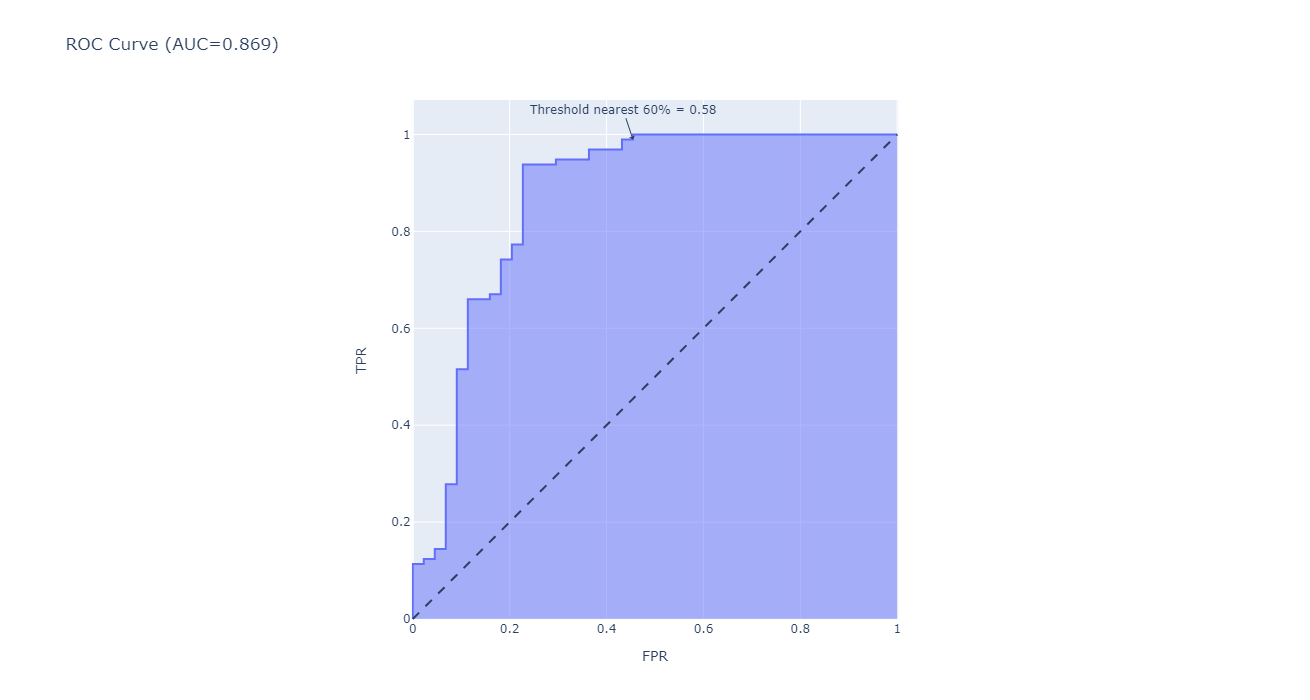

In [59]:
import plotly.express as px

def make_rocauc(i):
    nearest=roc_df.iloc[(roc_df['Threshold']-i).abs().argsort()[:1]]['Threshold'].values[0]
    q=roc_df[roc_df['Threshold']==nearest].index[0]
    print(nearest, q)
    fig = px.area(roc_df, x="FPR", y="TPR",
                  title=f'ROC Curve (AUC={metrics.auc(fpr, tpr):.3f})',
                  hover_data={'Threshold':':.2f',
                              'FPR':':.2f',
                              'TPR':':.2f',
                             },width=800, height=700)

    fig.add_annotation(x=roc_df.iloc[q][0], y=roc_df.iloc[q][1],
            text=f"Threshold nearest {i*100:.0f}% = {roc_df.iloc[q][2]:.2f}",
                showarrow=True,
                arrowhead=1)

    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )
    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    return fig
make_rocauc(.60)

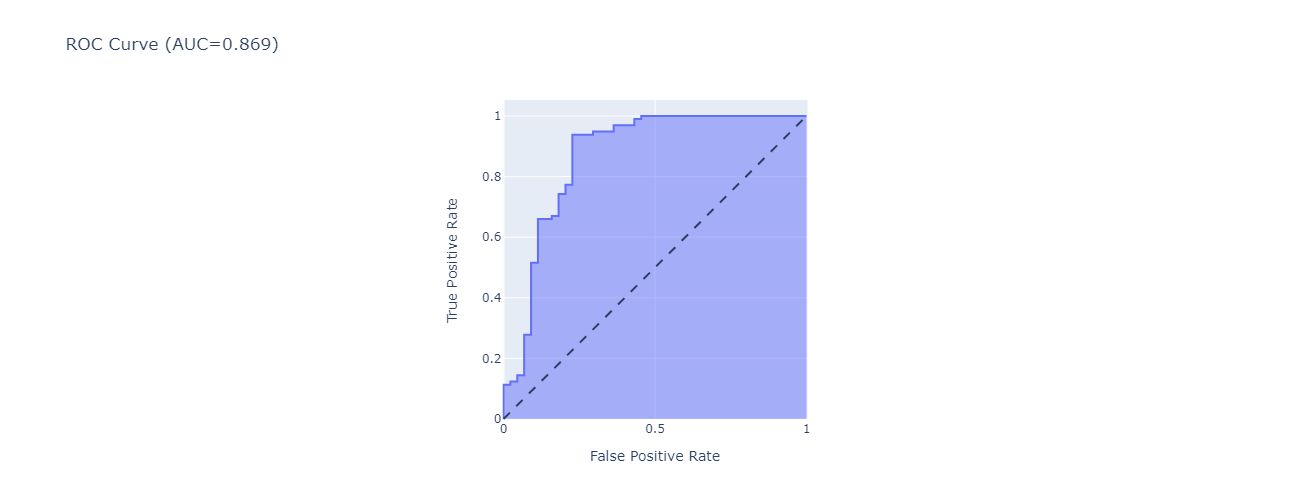

In [60]:
# display with plotly
import plotly.express as px
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={metrics.auc(fpr, tpr):.3f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.write_json('../assets/rocauc.json')
fig.show()

## Make predictions on new data

In [61]:
# check out one row of the test data
X_test.iloc[0]

Credit_History         1.0
Married                1.0
LoanAmount            17.0
Loan_Amount_Term     120.0
ApplicantIncome     1299.0
Name: 14, dtype: float64

In [62]:
# show a prediction & probability for that value
print(mymodel.predict([X_test.iloc[0].values])[0])
print(mymodel.predict_proba([X_test.iloc[0].values]).max())

1
0.9364010572793324


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [63]:
# pickle your model
import pickle
filename = open('loan_approval_logistic_model_new.pkl', 'wb')
pickle.dump(mymodel, filename)
filename.close()

In [64]:
# read in our pickle file
filename = open('loan_approval_logistic_model_new.pkl', 'rb')
unpickled_model = pickle.load(filename)
filename.close()

In [67]:
# make predictions on new data
fake1=[[1, 0, 1000, 180, 100]]
fake2=[[1, 1, 300, 360, 4500]]
fake3=[[0, 0, 100, 360, 1000]]

In [68]:
# make predictions
for data in [fake1, fake2, fake3]:
    y = unpickled_model.predict(data)
    func = lambda y: 'approved' if y[0]==1 else 'denied'
    formatted_y = func(y)
    prob=unpickled_model.predict_proba(data).max()*100
    formatted_prob = "{:,.2f}%".format(prob)
    print(y[0]==1)
    print(formatted_y)
    print(formatted_prob)

False
denied
70.58%
True
approved
71.93%
False
denied
83.30%


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/home/studio-lab-use

In [69]:
# change the threshold
Threshold=50
for data in [fake1, fake2, fake3]:
        rawprob=100*unpickled_model.predict_proba(data)[0][0]
        func = lambda y: 'Denied' if int(rawprob)>Threshold else 'Approved'
        formatted_y = func(y)
        print(rawprob)
        print(formatted_y)

70.58187710535823
Denied
28.073708833363696
Approved
83.29815426291522
Denied


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [70]:
# probability of 'denied'
print(unpickled_model.predict_proba(data)[0][0])
# probability of 'denied'
unpickled_model.predict_proba(data)[0][1]

0.8329815426291521


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



0.16701845737084783